In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importatation des donnees
au dessous on va utilse pandas pour manipuler cette dataset donc on veut lire à partir d'un fichier csv

In [2]:
data=pd.read_csv('dataSet.csv')

au dessous on va voir demention de la dataset (ligne,colone)

In [3]:
data.shape

(10, 4)

au dessous on va utilse la fonction head() pour lire les cinq premier elements et on peut parametrer

In [4]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


# Exploration des donnees
au dessous on va utilse la fonction describe() pour consulter cette dataset on donne (le moyenne max min procentage std)

In [5]:
data.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


les valeur categorique

In [6]:
data.describe(include=['object'])

,Country,Purchased
count,10,10
unique,3,2
top,France,Yes
freq,4,5


groupement des ensemble et la taille de chaque ensemble (nbre de ligne où laa recurence des vaaleur)

In [7]:
data.groupby('Age').size()

Age
27.0    1
30.0    1
35.0    1
37.0    1
38.0    1
40.0    1
44.0    1
48.0    1
50.0    1
dtype: int64

In [8]:
data.groupby('Purchased').size()

Purchased
No     5
Yes    5
dtype: int64

In [9]:
data.groupby('Country').size()

Country
France     4
Germany    3
Spain      3
dtype: int64

acceder a tout les ligne qui a la france

In [10]:
data.loc[data['Country']=="France",:]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes


In [11]:
data.loc[data['Country'].isin(["France","Spain"]),:]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes


croissement de deux colone voir l'intersection entre deux colone (nbr de linge de chaque valeur )==> corrolation entre les colone

In [12]:
pd.crosstab(data['Age'],data['Salary'])

Salary,48000.0,54000.0,58000.0,61000.0,67000.0,72000.0,79000.0,83000.0
Age,,,,,,,,
27.0,1,0,0,0,0,0,0,0
30.0,0,1,0,0,0,0,0,0
35.0,0,0,1,0,0,0,0,0
37.0,0,0,0,0,1,0,0,0
38.0,0,0,0,1,0,0,0,0
44.0,0,0,0,0,0,1,0,0
48.0,0,0,0,0,0,0,1,0
50.0,0,0,0,0,0,0,0,1


    crosstable de deux colones lingne colone et on veut la moyene des aute colonne numerique=> tout persone purchased no w contry germany base sur age on veut la moyenne

In [13]:
pd.crosstab(data["Purchased"],data["Country"],values=data["Age"],aggfunc=pd.Series.mean)

Country,France,Germany,Spain
Purchased,,,
No,44.0,40.0,38.0
Yes,40.0,40.0,27.0


on va voir nbre de ligne contenant NaN POUR CHAQUE COLONNE

In [14]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

on va voir les noms des colones ==listes de chaine (object)de caracter contenant noms des colonnes

In [15]:
l=data.columns
l

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [17]:
data['Country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

trie tout les valeurs par rapport colonnes Age et la position intial fil base

In [18]:
data.sort_values(by='Age')

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
5,France,35.0,58000.0,Yes
9,France,37.0,67000.0,Yes
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
0,France,44.0,72000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
6,Spain,NaN,52000.0,No


nbre de valeurs distinct pour chaque contry

In [19]:
data['Country'].value_counts()

France     4
Germany    3
Spain      3
Name: Country, dtype: int64

donner tout personnes age 48

In [20]:
data.loc[data['Age']==48,:]

,Country,Age,Salary,Purchased
7,France,48.0,79000.0,Yes


tracer un histogramme nbre salaire de personne pur chaque country

array([[<AxesSubplot:title={'center':'France'}>,
        <AxesSubplot:title={'center':'Germany'}>],
       [<AxesSubplot:title={'center':'Spain'}>, <AxesSubplot:>]],
      dtype=object)

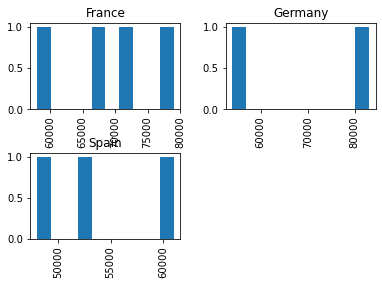

In [21]:
data.hist(column='Salary',by='Country')

tracer deux histogrammes dont age , salaire daimentions 7,7 par rapport nombre de personne

<AxesSubplot:title={'center':'Salary'}>

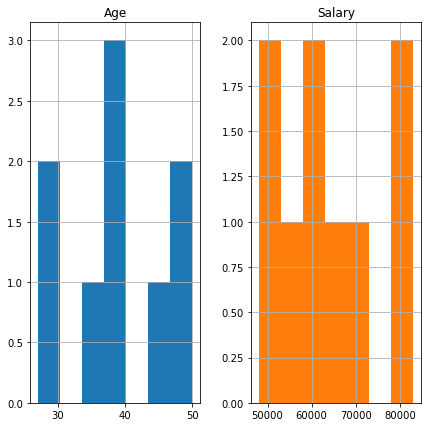

In [22]:
num_att= data[['Age','Salary']]
num_att.hist(bins=7,figsize=(7,7))
data['Salary'].hist(bins=7,figsize=(7,7))

au dessous on calcule borne inf de la box

In [23]:
Q1=data['Salary'].quantile(0.25)
print(Q1)

54000.0


au dessous on calcule borne sup de la box

In [24]:
Q3=data['Salary'].quantile(0.75)
print(Q3)

72000.0


au dessous on calcule le moyenne de la box

In [25]:
print((Q1+Q3)/2)

63000.0


au dessous on calcule l'inf de l'axe

In [26]:
IQR=Q3-Q1
inf=Q1-1.5*IQR

au dessous on calcule LE SUP de l'axe

In [27]:
IQR=Q3-Q1
sup=Q3+1.5*IQR

au dessous on va visualiser les valeur aberantes à l'aide de la bibliotheque seaborn

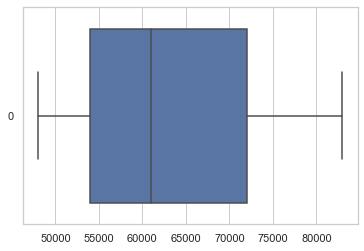

In [28]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=data['Salary'],orient='h')

personne c'est un point 

Text(0, 0.5, 'Salary')

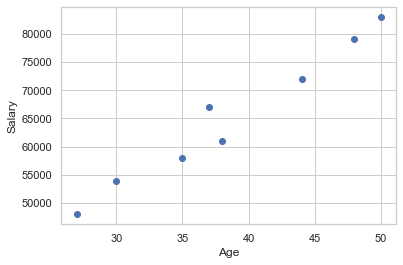

In [29]:
plt.scatter(x=data['Age'],y=data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')

trouve les valeurs manquant pour chaque ligne et chaque colonnes

In [30]:
# Créer une nouvelle fonction qui détermine si la valeur en paramètre est manquante:
def num_missing(x):
    return sum(x.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(data.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne
# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(data.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque ligne

Valeurs manquantes par colonne:
Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

Valeurs manquantes par ligne:
0    0
1    0
2    0
3    0
4    1
dtype: int64


#  Imputation des valeurs manquantes

In [32]:
# Tout d'abord nous importons une fonction pour déterminer le mode
from scipy.stats import mode
data['Country'].mode()

0    France
dtype: object

In [33]:
data['Purchased'].mode()[0]

'No'

Maintenant, nous pouvons remplir les valeurs manquantes et vérifier en utilisant la technique # 2.

In [34]:
# Imputer les valeurs:
data['Country'].fillna(data['Country'].mode().iloc[0], inplace=True)
data['Purchased'].fillna(data['Purchased'].mode().iloc[0], inplace=True)

# Puis on re-teste les valeurs manquantes de nouveau pour valider:
print(data.apply(num_missing, axis=0))

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


Get value within a series

In [36]:
data.loc[0].iat[1]

44.0